In the following, we experiment with aDM-identifiability of conformal maps.

In [38]:
from jax import numpy as np
from jax import random

import numpy as onp

In [39]:
rng, flow_rng = random.split(random.PRNGKey(0))
key = rng

0. Generate and plot sources

In [40]:
# N:=Number of samples
N = 1000
# D:=Number of dimensions
D = 6

# Generate the samples
S = random.uniform(key, shape=(N, D), minval=0.0, maxval=1.0)

S -= 0.5

In [41]:
from plotting import cart2pol, scatterplot_variables

_, colors = cart2pol( S[:,0], S[:,1])

if D==2:
    # Plot the sources
    scatterplot_variables(S, 'Sources', colors=colors, savefig=False)

In [42]:
# Now we need to implement Möbius transformations in D>2

In [43]:
from mixing_functions import build_moebius_transform

In [44]:
# Generate a random orthogonal matrix
from scipy.stats import ortho_group # Requires version 0.18 of scipy

A = ortho_group.rvs(dim=D)

In [45]:
# Scalar
alpha = 2.0
# Two vectors with data dimensionality
a = 2.0 * np.ones(D) # a vector in \RR^D
b = 3.0 * np.ones(D) # a vector in \RR^D

from jax import vmap
mixing, _ = build_moebius_transform(alpha, A, a, b, epsilon=2)
mixing_batched = vmap(mixing)

In [46]:
X = mixing_batched(S)
X -= np.mean(X, axis=0)

In [47]:
X.shape

(1000, 6)

In [48]:
if D==2:
    scatterplot_variables(X, 'Observations', colors=colors, savefig=False)#True, fname="observations_flow")

3. Compare aDM of the true and learned solution

In [49]:
from metrics import aDM

In [50]:
from jax import jacfwd

In [51]:
# Compute the batched Jacobian
Jmixing = jacfwd(mixing)
Jmixing_batched = vmap(Jmixing)
# Compute aDM true
true_aDM = aDM(Jmixing_batched, S)

In [52]:
print(true_aDM)

-1.4305114e-08


4. Plot reconstructed variables

In [53]:
# scatterplot_variables(Y, 'Reconstructed', colors=colors, savefig=False)#, fname="Reconstructed_flow")

6. Compare Jacobians of the learned transformation and of the true mixing

In [54]:
# Average Jacobian of the true solution
ave_jac_true = np.mean(Jmixing_batched(S), axis=0)
print(ave_jac_true)

[[ 0.04637941  0.01826954  0.0182267   0.02885225  0.04194881  0.0305019 ]
 [-0.02928578 -0.02406408  0.03826185  0.02089188 -0.02654018  0.05106493]
 [-0.00249649  0.00964402 -0.01401388  0.07073212 -0.02416766 -0.02796493]
 [-0.05119894  0.00178848 -0.03419571  0.01443067  0.04889013  0.0166216 ]
 [-0.03053699  0.03641513  0.05526886 -0.00211054  0.01693173 -0.03222139]
 [ 0.00588498 -0.06529867  0.01970942  0.01092081  0.02969036 -0.03104408]]


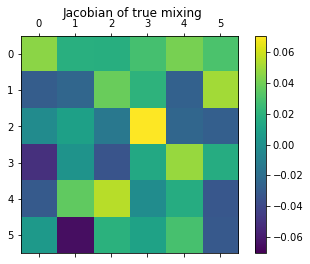

In [55]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)
plt.suptitle('Jacobian of true mixing')
m = np.max(np.abs(ave_jac_true))
im = ax.matshow(ave_jac_true, vmin=-m, vmax=m)
f.colorbar(im)
plt.show()